<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/kmeans_tf_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

centroids [[5.65000000e+01 6.01694915e-01 8.47457627e-01 1.34567797e+02
  2.96025424e+02 1.44067797e-01 4.15254237e-01 1.46135593e+02
  3.89830508e-01 1.13050847e+00 1.38983051e+00 9.91525424e-01]
 [5.30054054e+01 7.35135135e-01 1.04324324e+00 1.29745946e+02
  2.14524324e+02 1.51351351e-01 6.00000000e-01 1.51886486e+02
  2.86486486e-01 9.81621622e-01 1.40540541e+00 8.27027027e-01]]


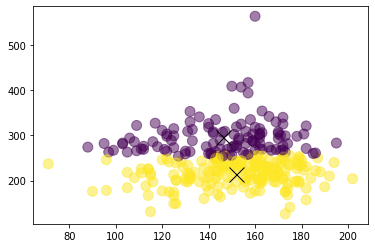

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import requests
import pandas as pd


import io
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

#points_n = 200
clusters_n = 2
iteration_n = 10
#points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
points = tf.constant(heart_data.values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1])) 
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)
 
means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))
 
new_centroids = tf.concat(means, 0)
 
update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
     
  print("centroids", centroid_values)
 
plt.scatter(points_values[:, 7], points_values[:, 4], c=assignment_values, s=100, alpha=0.5)
plt.plot(centroid_values[:, 7], centroid_values[:, 4], 'kx', markersize=15)
plt.show()
